## Dataset Overview: AI Assistant Usage Among Students
- The dataset contains 10,000 records capturing how students from different academic levels and disciplines use an AI assistant in their studies. Each record represents a single AI usage session with details such as session length, number of prompts, task type, and level of AI assistance provided.

- The data also tracks student demographics (**StudentLevel**, **Discipline**), session activity metrics (**SessionLengthMin**, **TotalPrompts**), and outcomes (**FinalOutcome**, **UsedAgain**, **SatisfactionRating**). This makes it useful for exploring patterns in AI adoption, effectiveness in academic tasks (e.g., studying, coding, writing), and student satisfaction.

- In short, the dataset offers insights into:

    - Who is using AI (level & discipline)

    - How they are using it (task types, session characteristics)

    - What results they achieved (outcomes, satisfaction, reuse behavior)

- It support data science and machine learning tasks such as predicting satisfaction, modeling AI usage habits, clustering students by behavior, or analyzing trends in academic AI adoption.

## Part A: Basic EDA

### 1. Loading the data and displaying the first 5 rows

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ai_assistance = pd.read_csv("C:/Users/Public/ML/ai_assistant_usage_student_life.csv")
ai_assistance.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


### 2. Check the dataset shape (rows and columns)

In [3]:
ai_assistance.shape

(10000, 11)

### 3. Display column names and their data types.


In [4]:
#data structure
ai_assistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


### 4. Check for missing values in each column.

In [5]:
#Missing values in each column
print(ai_assistance.isnull().sum())

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


### 5. Show summary statistics for SessionLengthMin and TotalPrompts.

In [6]:
#summary for SessionLengthMIn
ai_assistance[["SessionLengthMin", "TotalPrompts"]].describe()

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


### 6. Find the number of unique values in StudentLevel, Discipline, and TaskType.


In [7]:
# Unique counts
print("Unique counts:\n")
print(ai_assistance[['StudentLevel', 'Discipline', 'TaskType']].nunique())

# Unique values
print("\nUnique values:\n")
for col in ['StudentLevel', 'Discipline', 'TaskType']:
    print(f"{col}: {ai_assistance[col].unique()}\n")


Unique counts:

StudentLevel    3
Discipline      7
TaskType        6
dtype: int64

Unique values:

StudentLevel: ['Undergraduate' 'Graduate' 'High School']

Discipline: ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']

TaskType: ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']



### 7 Which TaskType is the most common?


In [8]:
#Most common TaskType
print(ai_assistance["TaskType"].value_counts().idxmax())

#value count of each category in TaskType
print(ai_assistance["TaskType"].value_counts())

Writing
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64


### 8. Calculate the average SessionLengthMin for each StudentLevel.


In [9]:
avg_session_by_level = ai_assistance.groupby("StudentLevel")["SessionLengthMin"].mean().reset_index()

print(avg_session_by_level)

    StudentLevel  SessionLengthMin
0       Graduate         20.252236
1    High School         20.023740
2  Undergraduate         19.650943


## Part B: Visualization


### 9. Plot a histogram of SessionLengthMin.


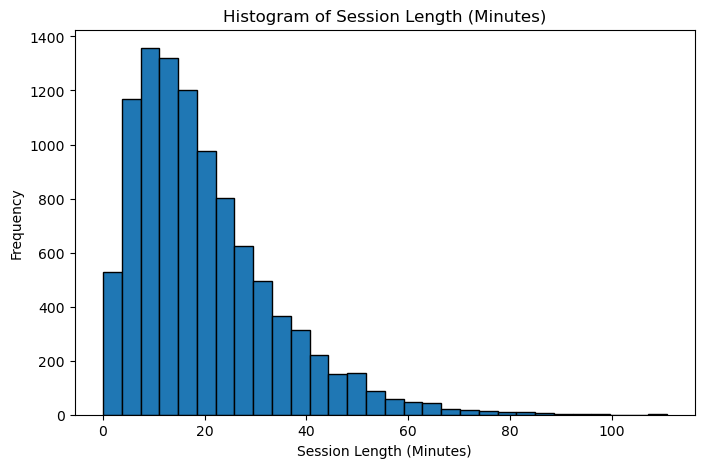

In [10]:
# Histogram of SessionLengthMin
plt.figure(figsize=(8,5))
plt.hist(ai_assistance['SessionLengthMin'], bins=30, edgecolor='black')
plt.title("Histogram of Session Length (Minutes)")
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Frequency")
plt.show()

### 10. Create a bar chart of session counts by StudentLevel.

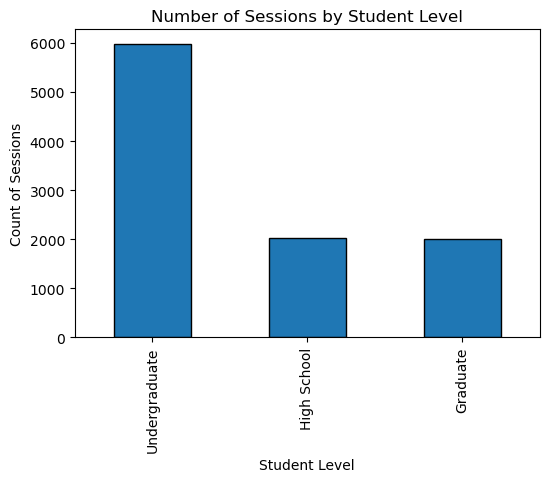

In [11]:
# Bar chart of session counts by StudentLevel
ai_assistance['StudentLevel'].value_counts().plot(
    kind='bar',
    figsize=(6,4),
    edgecolor='black'
)

plt.title("Number of Sessions by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Count of Sessions")
plt.show()

### 11. Make a countplot of TaskType using Seaborn

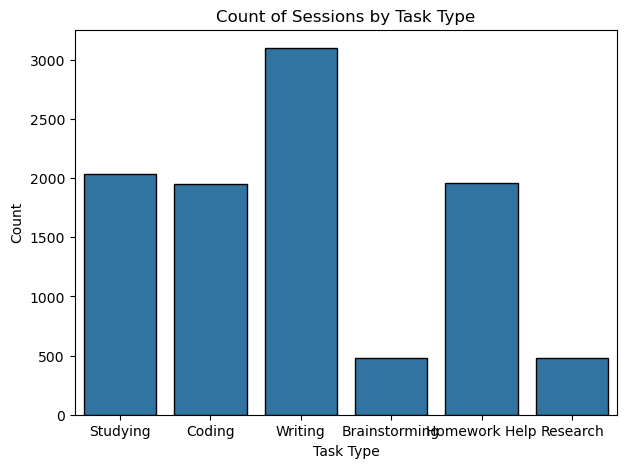

In [12]:
import seaborn as sns

# Countplot of TaskType
plt.figure(figsize=(7,5))
sns.countplot(data=ai_assistance, x='TaskType', edgecolor='black')

plt.title("Count of Sessions by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.show()

### 12. Plot a boxplot of SessionLengthMin grouped by StudentLevel.


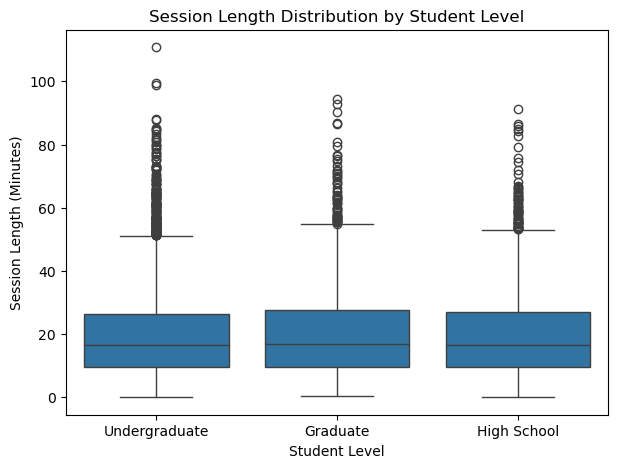

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(data=ai_assistance, x='StudentLevel', y='SessionLengthMin')

plt.title("Session Length Distribution by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.show()

### 13. Create a pie chart showing proportions of FinalOutcome

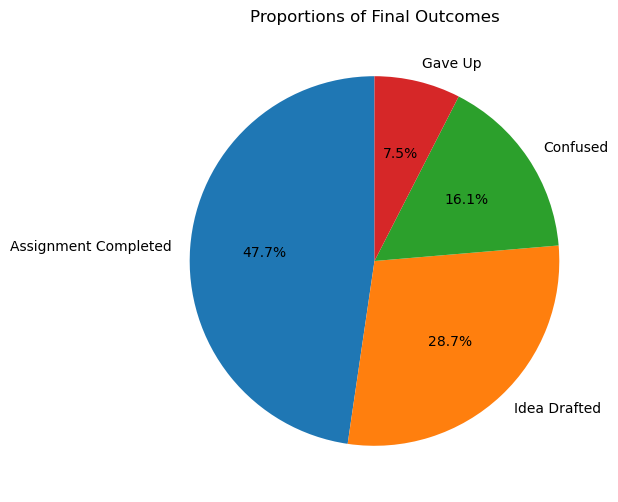

In [14]:
# Pie chart of FinalOutcome proportions
final_outcome_counts = ai_assistance['FinalOutcome'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    final_outcome_counts,
    labels=final_outcome_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Proportions of Final Outcomes")
plt.show()

### 14. Draw a scatterplot of SessionLengthMin vs. TotalPrompts

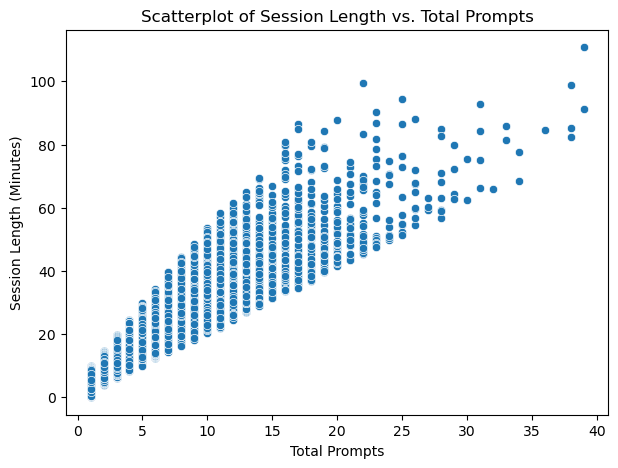

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=ai_assistance, x='TotalPrompts', y='SessionLengthMin')

plt.title("Scatterplot of Session Length vs. Total Prompts")
plt.xlabel("Total Prompts")
plt.ylabel("Session Length (Minutes)")
plt.show()


### 15. Plot a line chart of average AI_AssistanceLevel over time (SessionDate).

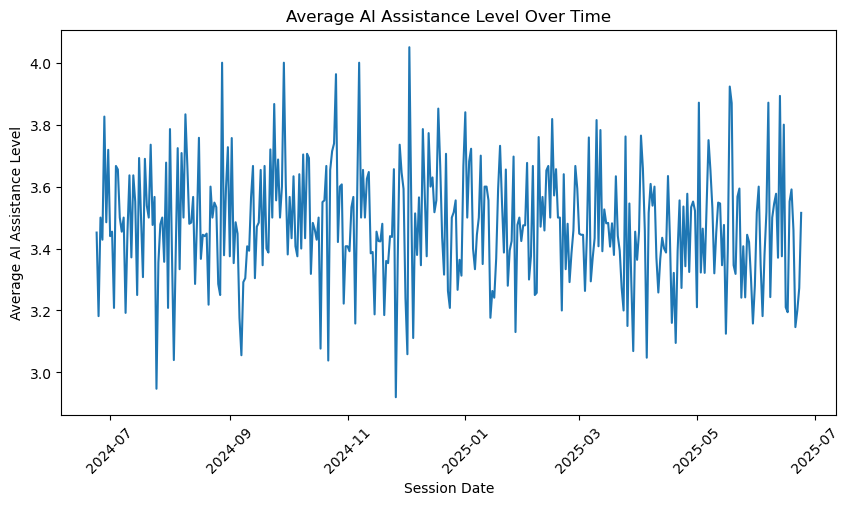

In [16]:
# Ensure SessionDate is in datetime format
ai_assistance['SessionDate'] = pd.to_datetime(ai_assistance['SessionDate'])

# Group by date and calculate mean AI_AssistanceLevel
avg_assist_over_time = (
    ai_assistance.groupby('SessionDate')['AI_AssistanceLevel']
    .mean()
    .reset_index()
)

# Line plot
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_assist_over_time, x='SessionDate', y='AI_AssistanceLevel')

plt.title("Average AI Assistance Level Over Time")
plt.xlabel("Session Date")
plt.ylabel("Average AI Assistance Level")
plt.xticks(rotation=45)
plt.show()


### 16. Create a heatmap of correlations among numeric features.

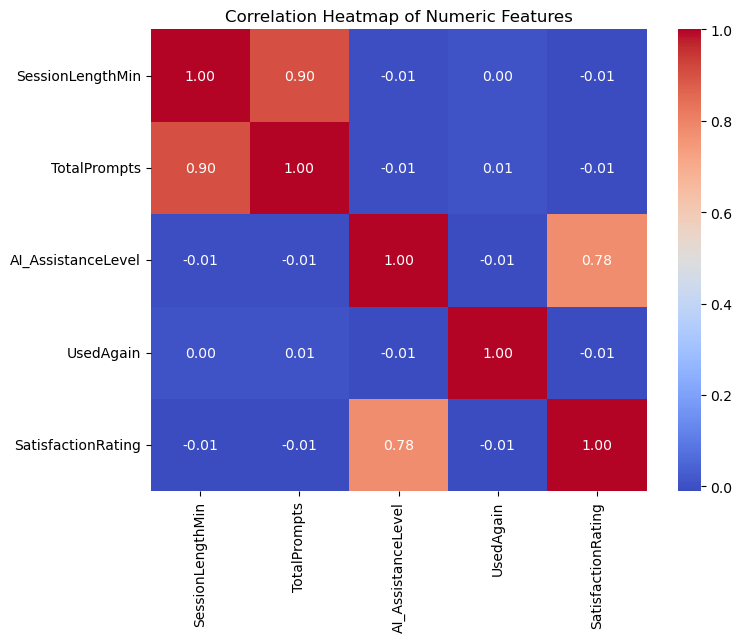

In [17]:
# Compute correlation matrix for numeric columns
corr_matrix = ai_assistance.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Part C: GroupBy & Aggregations


### 17. Find the average SessionLengthMin for each TaskType.

In [18]:
ai_assistance.groupby("TaskType")["SessionLengthMin"].mean().reset_index()

,TaskType,SessionLengthMin
0,Brainstorming,21.964223
1,Coding,19.467659
2,Homework Help,19.940536
3,Research,20.410000
4,Studying,19.705917
5,Writing,19.705888


### 18. Which Discipline had the most sessions?


In [19]:
ai_assistance["Discipline"].value_counts().idxmax()

'Biology'

### 19. Compare average AI_AssistanceLevel across StudentLevel.


In [20]:
ai_assistance.groupby("StudentLevel")["AI_AssistanceLevel"].mean().reset_index()

,StudentLevel,AI_AssistanceLevel
0,Graduate,3.469674
1,High School,3.477060
2,Undergraduate,3.483607


### 20. Find the most common FinalOutcome for Graduate students.


In [21]:
ai_assistance[ai_assistance["StudentLevel"] == "Graduate"]["FinalOutcome"].value_counts().idxmax()

'Assignment Completed'

### 21. Calculate the median SessionLengthMin for each FinalOutcome.

In [22]:
ai_assistance.groupby("FinalOutcome")["SessionLengthMin"].median().reset_index()

,FinalOutcome,SessionLengthMin
0,Assignment Completed,16.570
1,Confused,16.040
2,Gave Up,17.290
3,Idea Drafted,17.085


## Part D: Feature Engineering & Encoding


### 22. Convert SessionDate into Year, Month, and Day columns.


In [23]:
#Creating new columns
#year column
ai_assistance["Year"] = ai_assistance["SessionDate"].dt.year

#Month column
ai_assistance["Month"] = ai_assistance["SessionDate"].dt.month

#Day column
ai_assistance["Day"] = ai_assistance["SessionDate"].dt.day

In [24]:
# Show sample
print(ai_assistance[['SessionDate', 'Year', 'Month', 'Day']].head())

  SessionDate  Year  Month  Day
0  2024-11-03  2024     11    3
1  2024-08-25  2024      8   25
2  2025-01-12  2025      1   12
3  2025-05-06  2025      5    6
4  2025-03-18  2025      3   18


### 23. Encode StudentLevel using Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply encoding to StudentLevel
ai_assistance['StudentLevel_encoded'] = le.fit_transform(ai_assistance['StudentLevel'])

# Show mapping of labels to numbers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Preview
print(ai_assistance[['StudentLevel', 'StudentLevel_encoded']].head(10))


Label Mapping: {'Graduate': np.int64(0), 'High School': np.int64(1), 'Undergraduate': np.int64(2)}
    StudentLevel  StudentLevel_encoded
0  Undergraduate                     2
1  Undergraduate                     2
2  Undergraduate                     2
3  Undergraduate                     2
4  Undergraduate                     2
5       Graduate                     0
6    High School                     1
7  Undergraduate                     2
8  Undergraduate                     2
9  Undergraduate                     2


### 24. Apply One-Hot Encoding to TaskType.


In [26]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder (use sparse_output for new sklearn versions)
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform TaskType
tasktype_encoded = encoder.fit_transform(ai_assistance[['TaskType']])

# Get feature names
tasktype_cols = encoder.get_feature_names_out(['TaskType'])

# Create DataFrame with encoded columns
tasktype_df = pd.DataFrame(tasktype_encoded, columns=tasktype_cols, index=ai_assistance.index)

# Concatenate with original DataFrame
ai_assistance = pd.concat([ai_assistance, tasktype_df], axis=1)

# Preview
print(tasktype_df.head())


   TaskType_Brainstorming  TaskType_Coding  TaskType_Homework Help  \
0                     0.0              0.0                     0.0   
1                     0.0              0.0                     0.0   
2                     0.0              1.0                     0.0   
3                     0.0              1.0                     0.0   
4                     0.0              0.0                     0.0   

   TaskType_Research  TaskType_Studying  TaskType_Writing  
0                0.0                1.0               0.0  
1                0.0                1.0               0.0  
2                0.0                0.0               0.0  
3                0.0                0.0               0.0  
4                0.0                0.0               1.0  


### 25. Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.


In [27]:
#creating new feature/column called PromptsPerMinute
ai_assistance["PromptsPerMinute"] = ai_assistance["TotalPrompts"] / ai_assistance["SessionLengthMin"]

print(ai_assistance["PromptsPerMinute"].head())

0    0.352564
1    0.458365
2    0.260146
3    0.270270
4    0.320057
Name: PromptsPerMinute, dtype: float64


### 26. Bin SessionLengthMin into categories: Short, Medium, Long.


In [28]:
# Define bins and labels
bins = [0, 30, 60, float('inf')]   # 0–30 = Short, 31–60 = Medium, >60 = Long
labels = ['Short', 'Medium', 'Long']

# Create new column
ai_assistance['SessionCategory'] = pd.cut(ai_assistance['SessionLengthMin'], bins=bins, labels=labels, right=True)

# Preview
print(ai_assistance[['SessionLengthMin', 'SessionCategory']].head())


   SessionLengthMin SessionCategory
0             31.20          Medium
1             13.09           Short
2             19.22           Short
3              3.70           Short
4             28.12           Short


### Encoding Discipline using Label Encoder

In [29]:
le = LabelEncoder()
ai_assistance["Discipline_encoded"] = le.fit_transform(ai_assistance["Discipline"])

ai_assistance["Discipline_encoded"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Discipline_encoded
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


## Part E: Machine Learning (Classification Models)


### 🔹 About Decision Tree Model

- A Decision Tree Classifier splits the dataset into branches based on feature values (like SessionLengthMin, TotalPrompts, AI_AssistanceLevel) until it predicts a class (FinalOutcome in your case).

- Strengths: easy to interpret, handles categorical + numerical data, non-linear relationships.

- Weaknesses: tends to overfit (memorize training data) and may perform poorly on unseen test data compared to ensemble methods like Random Forest.

### 27. Predict FinalOutcome using a Decision Tree Classifier.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Encoding target variable (FinalOutcome)
le = LabelEncoder()
ai_assistance["FinalOutcome_encoded"] = le.fit_transform(ai_assistance["FinalOutcome"])

# 2. Collect One-Hot Encoded TaskType columns
tasktype_features = [col for col in ai_assistance.columns if col.startswith("TaskType_")]

# 3. Define features (include engineered + encoded columns)
features = [
    'SessionLengthMin',
    'TotalPrompts',
    'AI_AssistanceLevel',
    'PromptsPerMinute',
    'StudentLevel_encoded',
    'Discipline_encoded',
    'Year', 'Month', 'Day'
] + tasktype_features

# 4. Split features and target
X = ai_assistance[features]
y = ai_assistance["FinalOutcome_encoded"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 7. Predictions
y_pred_dt = dt.predict(X_test)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision (macro):", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_dt, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))


Accuracy: 0.3325
Precision (macro): 0.24763049142111027
Recall (macro): 0.24799623867097464

Confusion Matrix:
 [[429 154  84 263]
 [171  51  37  90]
 [ 81  34  12  43]
 [239 101  38 173]]

Detailed Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.47      0.46      0.46       930
            Confused       0.15      0.15      0.15       349
             Gave Up       0.07      0.07      0.07       170
        Idea Drafted       0.30      0.31      0.31       551

            accuracy                           0.33      2000
           macro avg       0.25      0.25      0.25      2000
        weighted avg       0.33      0.33      0.33      2000



## 🔹 Interpretation of Results

#### 1. Overall Metrics

- Accuracy: 0.33 → The model is correct only about 33% of the time, which is low given 4 classes (random guessing would be ~25%).

- Precision (macro): 0.25 & Recall (macro): 0.25 → On average, the model struggles equally across classes.

#### 2. Class-level Performance

- Assignment Completed (main class)

    - Precision = 0.47, Recall = 0.46 → This is the best-performing class. The tree is slightly better than random at identifying these cases.

- Confused & Idea Drafted

    - Precision/Recall around 0.15–0.30 → Model struggles, many are misclassified.

- Gave Up

    - Precision/Recall = 0.07 → The model almost completely fails at detecting this outcome.

#### 3. Confusion Matrix Insights

- The first row (Assignment Completed): Out of 930 true cases, the model only got 429 correct → about half were misclassified into the other outcomes.

- "Gave Up" (3rd row) is often confused as "Assignment Completed" or "Idea Drafted".

- Clear imbalance: the tree favors predicting the majority class (Assignment Completed).

#### 🔹 Takeaway for Decision Tree

- The model shows limited predictive power beyond the majority class.

- It tends to overfit and doesn’t generalize well here.

- This result sets the stage for why ensemble methods (Random Forest, XGBoost) or probabilistic models (Naive Bayes) may perform better.

### 28. Train a Random Forest Classifier to predict FinalOutcome.

### 🔹 About Random Forest Model

- A Random Forest is an ensemble of many decision trees.

- Each tree is trained on a random subset of data & features, and predictions are made by majority vote.

- This reduces overfitting (a common problem in single decision trees) and usually improves accuracy.

In [31]:
from sklearn.ensemble import RandomForestClassifier
# 1. Initialize the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
model_rf.fit(X_train, y_train)

# 3. Predict the model
y_pred_rf = model_rf.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

labels = np.unique(y_test)  # only use labels present in y_test
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_rf, labels=labels, target_names=le.inverse_transform(labels)
))



Accuracy: 0.4545
Precision (macro): 0.3092948717948718
Recall (macro): 0.2834482734116103

Confusion Matrix:
 [[740  26   4 160]
 [239  26   2  82]
 [123  14   1  32]
 [378  30   1 142]]

Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.50      0.80      0.61       930
            Confused       0.27      0.07      0.12       349
             Gave Up       0.12      0.01      0.01       170
        Idea Drafted       0.34      0.26      0.29       551

            accuracy                           0.45      2000
           macro avg       0.31      0.28      0.26      2000
        weighted avg       0.38      0.45      0.39      2000



### 🔹 Interpretation of Results

#### 1. Overall Metrics

- Accuracy: 0.45 → This is better than the Decision Tree’s 0.33. The Random Forest is learning stronger patterns.

- Precision (macro): 0.31 and Recall (macro): 0.28 → Still modest, but both improved compared to Decision Tree (0.25 each).

#### 2. Class-level Performance

- Assignment Completed (dominant class):

    - Precision = 0.50, Recall = 0.80 → The model is very good at catching most “Assignment Completed” cases (high recall), but mislabels other categories as this one (precision not very high).

- Confused:

    - Precision = 0.27, Recall = 0.07 → The model struggles to detect “Confused” correctly. Only a few real Confused cases are caught.

 - Gave Up:

    - Precision = 0.12, Recall = 0.01 → Almost completely missed, similar to Decision Tree.

- Idea Drafted:

    - Precision = 0.34, Recall = 0.26 → A small improvement over Decision Tree, but still weak.

#### 3. Confusion Matrix Insights

- Most Assignment Completed cases (740/930) were correctly classified.

- However, many Confused (239) and Idea Drafted (378) cases were wrongly predicted as Assignment Completed → shows class imbalance bias.

- “Gave Up” is almost always misclassified.

#### 🔹 Takeaway for Random Forest

- The Random Forest outperforms the Decision Tree (higher accuracy, precision, and recall).

- Still biased toward the majority class (Assignment Completed), which is common when classes are imbalanced.

- Weak detection of minority outcomes (“Gave Up” & “Confused”).

- In practice, you’d consider techniques like class weighting, SMOTE (oversampling), or balanced Random Forests to address imbalance.

### 29. Train a Naive Bayes Classifier to predict FinalOutcome

### About Naive Bayes Model

- Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming features are independent.

- It’s usually good with text data, categorical features, or when features have conditional independence.

- It tends to be fast, simple, and good at handling high-dimensional data, but can struggle when independence assumptions don’t hold.

In [32]:
from sklearn.naive_bayes import GaussianNB

# 1. Initialize the model
model_nb = GaussianNB()

# 2. Train the model
model_nb.fit(X_train, y_train)

# 3. Predict the model
y_pred_nb = model_nb.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision (macro):", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_nb, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Fix: show report only for labels in test set
labels = np.unique(y_test)
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_nb, labels=labels, target_names=le.inverse_transform(labels)
))


Accuracy: 0.463
Precision (macro): 0.31485998642159435
Recall (macro): 0.2745010867027559

Confusion Matrix:
 [[845  32   9  44]
 [286  21   9  33]
 [144  12   5   9]
 [459  28   9  55]]

Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.49      0.91      0.63       930
            Confused       0.23      0.06      0.10       349
             Gave Up       0.16      0.03      0.05       170
        Idea Drafted       0.39      0.10      0.16       551

            accuracy                           0.46      2000
           macro avg       0.31      0.27      0.23      2000
        weighted avg       0.39      0.46      0.36      2000



### 🔹 Interpretation of Results

#### 1. Overall Metrics

- Accuracy: 0.463 → Slightly better than Random Forest (0.4545) and much better than Decision Tree (0.3325).

- Precision (macro): 0.31, Recall (macro): 0.27 → Almost identical to Random Forest.

#### 2. Class-level Performance

- Assignment Completed:

    - Precision = 0.49, Recall = 0.91 → The model catches nearly all “Assignment Completed” cases (very high recall) but does so at the cost of misclassifying other outcomes into this category.

- Confused:

    - Precision = 0.23, Recall = 0.06 → Performs poorly, very few Confused cases are caught.

- Gave Up:

    - Precision = 0.16, Recall = 0.03 → Almost completely ignored.

- Idea Drafted:

    - Precision = 0.39, Recall = 0.10 → Better precision than Random Forest, but still very low recall (misses most true cases).

#### 3. Confusion Matrix Insights

- 845/930 “Assignment Completed” cases are correctly identified → explains the very high recall for this class.

- But 459 “Idea Drafted” and 286 “Confused” were wrongly predicted as “Assignment Completed.”

- “Gave Up” is consistently misclassified into other classes.

#### 🔹 Takeaway for Naive Bayes

- Outperforms Decision Tree, and slightly edges out Random Forest in terms of accuracy.

- Still heavily biased toward “Assignment Completed”, with weak detection of minority classes.

- This is expected: Naive Bayes tends to lean toward the most frequent class when data is imbalanced.

### 30. Apply an XGBoost Classifier to predict FinalOutcome

### 🔹 About XGBoost Model

- XGBoost (Extreme Gradient Boosting) is a powerful ensemble method that builds trees sequentially, correcting errors made by previous trees.

- It’s generally very strong on structured/tabular datasets, often outperforming simpler models.

- Handles imbalanced data better than most tree-based models, but still requires tuning (like adjusting class weights, depth, and learning rate).

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# 1. Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 2. Train the model
xgb.fit(X_train, y_train)

# 3. Predict
y_pred_xgb = xgb.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision (macro):", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_xgb, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))


Accuracy: 0.4295
Precision (macro): 0.28370339776186326
Recall (macro): 0.2722408954845543

Confusion Matrix:
 [[682  43  14 191]
 [238  25   1  85]
 [115  10   2  43]
 [368  29   4 150]]

Classification Report:
                       precision    recall  f1-score   support

Assignment Completed       0.49      0.73      0.58       930
            Confused       0.23      0.07      0.11       349
             Gave Up       0.10      0.01      0.02       170
        Idea Drafted       0.32      0.27      0.29       551

            accuracy                           0.43      2000
           macro avg       0.28      0.27      0.25      2000
        weighted avg       0.36      0.43      0.37      2000



### 🔹 Interpretation of Results

#### 1. Overall Metrics

- Accuracy: 0.4295 → Slightly below Random Forest (0.4545) and Naive Bayes (0.463).

- Precision (macro): 0.28, Recall (macro): 0.27 → Similar to Random Forest/Naive Bayes, but slightly weaker in precision.

#### 2. Class-level Performance

- Assignment Completed

    - Precision = 0.49, Recall = 0.73 → Good at catching most “Assignment Completed” (better balance than Random Forest, but weaker than Naive Bayes which had recall 0.91).

- Confused

    - Precision = 0.23, Recall = 0.07 → Same issue as other models — struggles heavily.

- Gave Up

    - Precision = 0.10, Recall = 0.01 → Almost ignored entirely.

- Idea Drafted

    - Precision = 0.32, Recall = 0.27 → Better recall than Random Forest (0.26) and Naive Bayes (0.10), meaning XGBoost detects more “Idea Drafted” cases correctly.

#### 3. Confusion Matrix Insights

- 682/930 “Assignment Completed” cases correct, but still many misclassifications.

- Like Naive Bayes and Random Forest, XGBoost struggles with “Confused” and “Gave Up.”

- Strongest improvement is Idea Drafted recall (150/551 correctly classified).

#### 🔹 Takeaway for XGBoost

- Not the highest accuracy (below Naive Bayes and Random Forest), but:

    - More balanced performance for “Idea Drafted” than any of the other models.

    - Still biased toward “Assignment Completed,” though less extreme than Naive Bayes.

- This suggests XGBoost benefits from tuning (e.g., adjusting max_depth, n_estimators, learning_rate, or adding scale_pos_weight to handle imbalance).

## Model Comparison and Summary

### 📊 Model Performance

| Model              | Accuracy | Precision (Macro) | Recall (Macro) | Strengths | Weaknesses |
|--------------------|----------|-------------------|----------------|-----------|-------------|
| **Decision Tree**  | **0.3325** | 0.25 | 0.25 | Simple, interpretable | Very low accuracy, poor on minority classes |
| **Random Forest**  | **0.4545** | 0.31 | 0.28 | Stronger overall accuracy, good at “Assignment Completed” | Weak recall for “Confused” & “Gave Up” |
| **Naive Bayes**    | **0.463** | 0.31 | 0.27 | Best accuracy, excellent at “Assignment Completed” (recall = 0.91) | Ignores “Gave Up” & “Idea Drafted” almost completely |
| **XGBoost**        | **0.4295** | 0.28 | 0.27 | Most balanced across classes, better at “Idea Drafted” | Lower accuracy than RF & NB, weak on “Confused” & “Gave Up” |

---

### 📝 Summary & Insights

1. **Decision Tree**: Lowest performance (33% accuracy). Struggles to generalize and misclassifies minority classes heavily.  
2. **Random Forest**: Accuracy improves to 45%. Performs better than a single tree but still biased towards “Assignment Completed.”  
3. **Naive Bayes**: Achieves the **highest accuracy (46%)** and recalls “Assignment Completed” very well, but performs poorly on minority classes.  
4. **XGBoost**: Provides the most **balanced predictions**, especially for “Idea Drafted,” though accuracy (43%) is slightly lower. With hyperparameter tuning, it could outperform others.  

---

✅ **Takeaway:**  
- If **overall accuracy** is the main goal → **Naive Bayes** is the best performer.  
- If **balanced class predictions** matter → **XGBoost** is the stronger choice (with tuning).  
- **Random Forest** offers a safe middle ground.  
- **Decision Tree** is not recommended for this dataset.


### 31. Predict UsedAgain using Logistic Regression.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# 1. Encode target variable (UsedAgain)
le_used = LabelEncoder()
ai_assistance["UsedAgain_encoded"] = le_used.fit_transform(ai_assistance["UsedAgain"])

# 2. Define features (same as before)
tasktype_features = [col for col in ai_assistance.columns if col.startswith("TaskType_")]

features = [
    'SessionLengthMin',
    'TotalPrompts',
    'AI_AssistanceLevel',
    'PromptsPerMinute',
    'StudentLevel_encoded',
    'Discipline_encoded',
    'Year', 'Month', 'Day'
] + tasktype_features

X = ai_assistance[features]
y = ai_assistance["UsedAgain_encoded"]

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 5. Train
log_reg.fit(X_train, y_train)

# 6. Predict
y_pred_log = log_reg.predict(X_test)

# 7. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision (macro):", precision_score(y_test, y_pred_log, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_log, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nDetailed Classification Report:\n", 
      classification_report(y_test, y_pred_log, target_names=[str(c) for c in le_used.classes_]))

Accuracy: 0.6925
Precision (macro): 0.34625
Recall (macro): 0.5

Confusion Matrix:
 [[   0  615]
 [   0 1385]]

Detailed Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       615
        True       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



### Logistic Regression (UsedAgain)

**How the model works:**  
Logistic Regression is a simple linear model that estimates the probability of an outcome (here, whether a student would use AI again). It works best when the relationship between features and the target is mostly linear.  

**Results interpretation:**  
- **Accuracy = 69%** → On the surface, this seems fairly strong, but accuracy alone is misleading due to class imbalance.  
- **Confusion Matrix** shows that the model **predicted all cases as “True” (UsedAgain = Yes)**. It failed to identify any “False” cases.  
- **Precision & Recall:**  
  - For **True**: Recall = 1.00, meaning it successfully captured all students who *would* use AI again. Precision = 0.69, showing that when it predicted “True,” it was correct about 69% of the time.  
  - For **False**: Precision and Recall = 0.00, meaning the model completely failed to detect students who *would not* use AI again.  
- **Macro averages** (treating classes equally) are low, reflecting the poor balance.  

**Key takeaway:**  
Logistic Regression struggled here because of the **imbalanced dataset**. It defaulted to always predicting “True” (the majority class), ignoring “False.” While it appears accurate overall, it is **not useful for distinguishing between the two groups**, especially if identifying students who *wouldn’t* use AI again is important.  


### 32. Use KNN (K-Nearest Neighbors) to classify UsedAgain.


### About K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm.

- Instead of building an explicit mathematical model, KNN stores all training examples.

- To make a prediction, it looks at the K closest data points (neighbors) to a new input, using a distance metric (like Euclidean distance).

- The majority class among those neighbors becomes the predicted class.

🔑 Key points:

- K is the main hyperparameter (e.g., 3, 5, 7). A small K may overfit, while a large K may oversmooth.

- KNN works well when decision boundaries are irregular and nonlinear.

- It can be computationally heavy on large datasets since it compares against all training samples at prediction time.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors

# 2. Train
knn.fit(X_train, y_train)

# 3. Predict
y_pred_knn = knn.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision (macro):", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_knn, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nDetailed Classification Report:\n", 
      classification_report(y_test, y_pred_knn, target_names=[str(c) for c in le_used.classes_]))


Accuracy: 0.6315
Precision (macro): 0.4852574750830565
Recall (macro): 0.4916644653811159

Confusion Matrix:
 [[  79  536]
 [ 201 1184]]

Detailed Classification Report:
               precision    recall  f1-score   support

       False       0.28      0.13      0.18       615
        True       0.69      0.85      0.76      1385

    accuracy                           0.63      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.56      0.63      0.58      2000



### K-Nearest Neighbors (UsedAgain)

**How the model works:**  
KNN is a non-parametric model that classifies a new data point based on the majority class of its *k nearest neighbors* in the feature space. It can capture more complex, non-linear relationships than Logistic Regression but is sensitive to data imbalance and feature scaling.  

**Results interpretation:**  
- **Accuracy = 63%** → Slightly lower than Logistic Regression, but KNN does a better job of distinguishing both classes.  
- **Confusion Matrix:**  
  - Predicted 79 students correctly as “False” (would not use AI again), but misclassified 536 as “True.”  
  - Predicted 1184 correctly as “True,” but 201 students who said “True” were missed.  
- **Precision & Recall:**  
  - For **True**: Recall = 0.85, showing the model is very good at catching students who *would* use AI again. Precision = 0.69, meaning it is reasonably accurate when predicting “True.”  
  - For **False**: Recall = 0.13, Precision = 0.28 → very poor at detecting students who *would not* use AI again.  
- **Macro averages** (~0.49) show KNN handled both classes more evenly than Logistic Regression, though performance on the minority class (“False”) is still weak.  

**Key takeaway:**  
KNN improved slightly over Logistic Regression in capturing variation between classes. However, it still **heavily favors the majority “True” class** and struggles to identify “False” outcomes. The imbalance in the dataset limits its effectiveness, but at least it doesn’t completely ignore one class like Logistic Regression did.  


### 33. Build a Gradient Boosting Classifier for UsedAgain.


### 🌱 Gradient Boosting Classifier (GBC) – What it is

- Gradient Boosting is an ensemble learning method that builds models in a sequential way. Unlike Random Forest (which builds trees independently and averages them), Gradient Boosting builds one tree at a time, where each new tree corrects the errors of the previous ones.

- How it works (simplified):

    1. Start with a simple model (like a weak decision tree).

    2. Calculate the errors (residuals).

    3. Train the next tree to predict these errors.

    4. Add the new tree’s contribution to the model prediction.

    5. Repeat the process, gradually reducing the error.

✅ Strengths:

- Handles both classification and regression tasks.

- Usually provides high accuracy compared to simple models.

- Works well even when features are a mix of categorical and numerical.

⚠️ Weaknesses:

- Can overfit if not tuned properly.

- More computationally expensive than Logistic Regression or KNN.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)

# Train
gb_clf.fit(X_train, y_train)

# Predict
y_pred_gb = gb_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision (macro):", precision_score(y_test, y_pred_gb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_gb, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb, target_names=[str(c) for c in le_used.classes_]))


Accuracy: 0.69
Precision (macro): 0.4571683687705787
Recall (macro): 0.4990989404478883

Confusion Matrix:
 [[   2  613]
 [   7 1378]]

Classification Report:
               precision    recall  f1-score   support

       False       0.22      0.00      0.01       615
        True       0.69      0.99      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.46      0.50      0.41      2000
weighted avg       0.55      0.69      0.57      2000



### Gradient Boosting Classifier (UsedAgain)

**How the model works:**  
Gradient Boosting is an ensemble method that builds decision trees sequentially. Each new tree corrects the errors of the previous one by focusing on misclassified samples. It is often more powerful than single models like Logistic Regression or KNN, especially for structured/tabular data.

**Results interpretation:**  
- **Accuracy = 69%** → Similar to Logistic Regression, but slightly better balance across metrics.  
- **Confusion Matrix:**  
  - Correctly predicted **1378 “True”** cases, but only **2 “False”** cases out of 615 → showing strong bias toward predicting “True.”  
  - Misclassified almost all “False” students as “True.”  
- **Precision & Recall:**  
  - For **True**: Recall = 0.99 (almost perfect at identifying students who *would use AI again*), Precision = 0.69 (reasonable reliability when predicting “True”).  
  - For **False**: Recall ≈ 0.00 (fails to identify students who *would not* use AI again), Precision = 0.22.  
- **Macro averages (~0.46 precision, ~0.50 recall):** Better than Logistic Regression in recall balance, but still very weak for the minority “False” class.  
- **Weighted averages** are similar to Logistic Regression because of the overwhelming “True” dominance in the dataset.

**Key takeaway:**  
Gradient Boosting achieves **high recall for the majority “True” class** but almost entirely neglects the “False” class. While accuracy looks decent, the model is not reliable in pred


## Model Comparison for Target Variable: *UsedAgain*

We tested three models — Logistic Regression, K-Nearest Neighbors (KNN), and Gradient Boosting Classifier — to predict whether a student would use AI assistance again.

---

### 1. Logistic Regression
- **Accuracy:** 69%  
- **Strengths:** Very high recall for the *True* class (1.00), meaning it predicts almost all students who *will* use AI again.  
- **Weaknesses:** Completely failed to identify the *False* class (0% recall). Predictions are biased toward the majority class.  

**Conclusion:** Performs well for the majority class but unreliable for detecting students who would not use AI again.

---

### 2. K-Nearest Neighbors (KNN)
- **Accuracy:** 63%  
- **Strengths:** Better balance compared to Logistic Regression — some improvement in detecting the *False* class (recall = 0.13).  
- **Weaknesses:** Still strongly biased toward *True*. Accuracy is lower, and precision/recall for *False* remain weak.  

**Conclusion:** KNN provides slightly more balance than Logistic Regression but at the cost of overall accuracy.

---

### 3. Gradient Boosting Classifier
- **Accuracy:** 69%  
- **Strengths:** Extremely strong recall for *True* (0.99), with decent precision (0.69).  
- **Weaknesses:** Similar to Logistic Regression, it fails to capture the *False* class (recall ≈ 0.00). Predictions remain skewed.  

**Conclusion:** Powerful for majority class but performs poorly on minority class detection.

---

## Overall Summary
- All three models achieve **similar accuracy (~63–69%)** but are heavily influenced by the imbalance in the dataset.  
- Logistic Regression and Gradient Boosting maximize recall for the *True* class but completely neglect the *False* class.  
- KNN shows slightly more balance but with lower overall accuracy.  

### Key Insight
The main challenge here is **class imbalance**: since most students said they would use AI again (*True*), models struggle to learn patterns for those who said *False*.  
Before drawing final conclusions, methods like **class rebalancing (SMOTE, class weights, or undersampling)** should be considered to improve fairness and predictive power across both classes.
